<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Análisis y Visualización</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook, realizaremos la carga del **dataset** que utilizarán para el práctico de Análisis y Visualización. Para ello, comenzaremos con las importaciones pertinentes.<br>
Posteriormente, se detallarán las consignas a seguir para la elaboración del informe.

### Importaciones

In [0]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

### Carga de Datos

In [20]:
# Cargamos el Dataset de A&V en una variable
url_data = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train%20-%20A%26V.csv'
_ds = pd.read_csv(url_data, sep='\t', index_col = 0)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana


In [21]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.cvs'
_data_fields = pd.read_csv(url_fields_info, sep=';', encoding = 'latin-1')
_data_fields.head(10)

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household
5,refrig,=1 if the household has refrigerator
6,v18q,owns a tablet
7,v18q1,number of tablets household owns
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older


Las variables:

In [22]:
print('', _ds.loc[:,'MaterialPared':'Zona'].columns.values)

 ['MaterialPared' 'MaterialPiso' 'MaterialTecho' 'AbastecimientoAgua'
 'AbastecimientoElectricidad' 'TipoSanitario' 'EnergiaCocina'
 'EliminacionBasura' 'EstadoPared' 'EstadoTecho' 'EstadoPiso' 'Genero'
 'TipoVivienda' 'Region' 'Zona']


han sido reconstruídas como variables categóricas utilizando el dataset original, en el cual se encontraban como *dummies*. Para consultar su descripción, remitirse a la *dummy* correspondiente.

A modo de recordatorio: la variable `Target` constituye nuestro objetivo de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habitan las personas (cada uno de los registros), según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

### Primera Aproximación a los Datos

In [23]:
# Obtenemos la cantidad de filas y columnas del Dataset Original
_shape = _ds.shape
print("Nuestro Dataset de A&V tiene", _shape[0], "filas y", _shape[1],"columnas.")

Nuestro Dataset de A&V tiene 9557 filas y 85 columnas.


In [24]:
# Observamos algunos registros más
_ds.head(20)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,38,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,3,8,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,yes,9,no,10.0,1,0,0,0,0,0,0,0,0,1,4.000000,0,0,1,1,7,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared1,etecho1,eviv2,female,tipovivi3,Central,Urbana
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,9,NaN,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,yes,9,no,10.0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,1,30,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared1,etecho1,eviv2,male,tipovivi3,Central,Urbana
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,yes,9,no,10.0,0,0,0,0,1,0,0,0,0,1,4.000000,0,0,1,1

In [25]:
# Obtenemos los tipos de datos por columnas
data_types = _ds.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
Id,object
v2a1,float64
hacdor,int64
rooms,int64
hacapo,int64
v14a,int64
refrig,int64
v18q,int64
v18q1,float64


### Breve Análisis Exploratorio

In [26]:
# Obtenemos los estadísticos básicos para todas las variables, incluyendo las variables categóricas.
_ds.describe(include = 'all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557,9557,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557,9491,9557,9542,9557,9557,9557,9557,9557,9557,9557,9557,9557,9557
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2988,NaN,NaN,NaN,NaN,31,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,6,4,3,4,5,4,5,3,3,3,2,5,6,2
top,ID_76e7f7a45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fd8a6d014,NaN,NaN,NaN,NaN,yes,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario3,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi1,Central,Urbana
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,2192,3762,6230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5677,6621,9271,9220,8459,7304,4679,8436,5449,5577,6175,4937,5911,5616,6829
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.677409,0.057549,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,NaN,1.406613,2.592445,0.284085,3.999058,NaN,NaN,NaN,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.102124,0.284608,0.975306,2.821492,34.303547,3.302292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.946550,1.772216,0.467492,0.232902,0.344713,0.328753,0.443145,0.175780,0.242582,0.179088,0.474631,0.462960,0.387548,0.485857,0.109506,0.097119,0.220349,0.099725,0.049001,0.114514,0.055942,0.111812,0.092791,NaN,1.366185,1.166074,0.597163,1.772216,NaN,NaN,NaN,4.167694,0.341384,

In [27]:
# Observamos los valores posibles del campo "Parentesco1"
# Este campo indica si la persona es o no jefa de hogar.
_arr = _ds['parentesco1'].unique()
_arr

array([1, 0])

In [36]:
_ds['Region'].unique()

array(['Central', 'Chorotega', 'Pacífico Central', 'Brunca',
       'Huetar Atlántica', 'Huetar Norte'], dtype=object)

In [28]:
# Obtenemos la frecuencia
_ds['parentesco1'].value_counts(normalize = True)

0    0.688919
1    0.311081
Name: parentesco1, dtype: float64

In [29]:
# Obtenemos la cantidad de hogares de la muestra
print('Cantidad de hogares de la muestra:',_ds['idhogar'].unique().shape[0])

Cantidad de hogares de la muestra: 2988


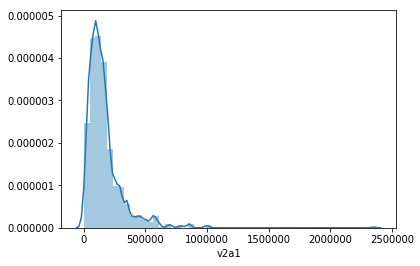

In [30]:
# Graficamos la distribución del alquiler mensual
sns.distplot(_ds['v2a1'].dropna())

In [31]:
# Analizamos la distribución de individuos por edades
_ds['age'].value_counts().sort_index()

0      99
1     120
2     116
3     143
4     139
5     134
6     150
7     140
8     136
9     140
10    138
11    133
12    139
13    154
14    142
15    153
16    180
17    175
18    179
19    170
20    179
21    163
22    166
23    189
24    156
25    146
26    139
27    157
28    159
29    143
30    178
31    131
32    149
33    128
34    120
35    133
36    132
37    122
38    143
39    126
40    118
41     82
42    139
43    132
44     95
45    121
46    111
47    116
48    116
49    111
50    139
51    111
52    135
53    130
54    131
55    109
56    113
57    115
58     94
59     93
60    115
61     75
62     99
63     88
64     83
65     63
66     69
67     68
68     66
69     53
70     69
71     30
72     52
73     43
74     50
75     41
76     39
77     30
78     32
79     26
80     28
81     19
82     24
83     24
84     12
85     18
86     15
87     12
88     11
89     12
90      7
91      8
92      6
93      5
94      7
95      2
97      6
Name: age, dtype: int64

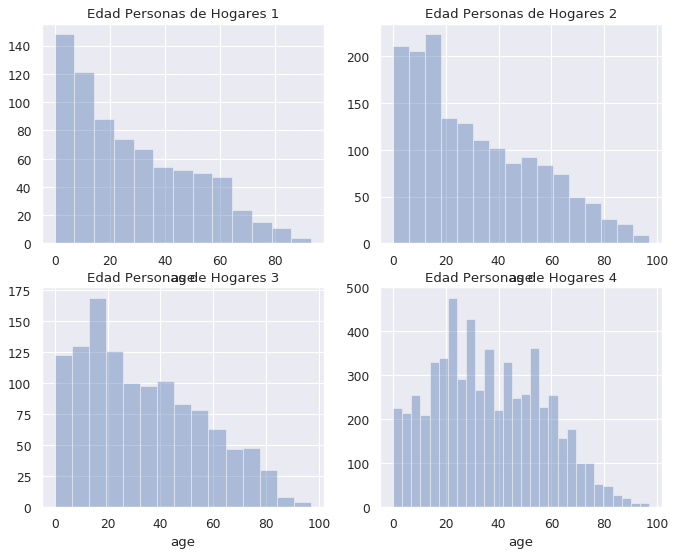

In [32]:
# Analizamos la distribución de la edad de los individuos
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
       
subplot(2,2,1)
title('Edad Personas de Hogares 1')
sns.distplot(_ds[_ds['Target'] == 1]['age'],kde=False)
subplot(2,2,2)
title('Edad Personas de Hogares 2')
sns.distplot(_ds[_ds['Target'] == 2]['age'],kde=False)
subplot(2,2,3)
title('Edad Personas de Hogares 3')
sns.distplot(_ds[_ds['Target'] == 3]['age'],kde=False)
subplot(2,2,4)
title('Edad Personas de Hogares 4')
sns.distplot(_ds[_ds['Target'] == 4]['age'],kde=False)

### Distribución de Clases

In [33]:
# Analizamos la distribución de las clases
clases_count = _ds['Target'].value_counts().sort_index()
clases_perc = _ds['Target'].value_counts(normalize = True).sort_index()
_clases_df = pd.DataFrame(data = [clases_count,clases_perc]).transpose()
_clases_df.columns = ['ClassesCount','ClassesPercentage']
_clases_df

,ClassesCount,ClassesPercentage
1,755.0,0.079000
2,1597.0,0.167103
3,1209.0,0.126504
4,5996.0,0.627394


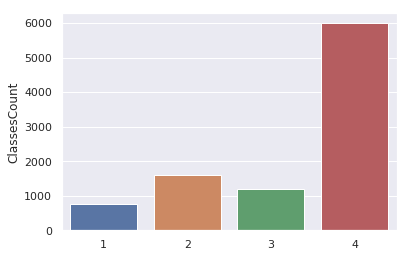

In [34]:
matplotlib.pyplot.clf()
sns.barplot(x =_clases_df.index, y = _clases_df['ClassesCount'])

## Consigna para Informe de Análisis y Visualización

### 1. General

Se propone la **elaboración de un informe** que deberá entregarse en formato html o pdf y deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.<br>
La estructura del mismo puede seguir un esquema de secciones como el siguiente: **Introducción - Presentación del Dataset - Variables más relevantes o de interés - Respuestas a preguntas disparadoras - Relaciones interesantes entre variables - Principales conclusiones y posibilidad de futuros aportes**. No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes para comunicar.
Pueden tomar, a modo de ejemplo, la sección 4 de __[este informe](http://www.inec.go.cr/sites/default/files/documetos-biblioteca-virtual/enaho-2018.pdf)__.

### 2. Análisis Estadístico de Variables

Se espera un análisis estadístico riguroso de variables que seleccionen por ser de su interés o porque crean que son relevantes (entre 2 y 4). Deberán responder preguntas como:
- Qué **tipo de variable** es cada una?
- Existen **outliers** en las variables seleccionadas?
- Hay **valores faltantes**? Qué decisión tomarán al respecto en esta instancia de análisis? Es mejor descartarlos o completarlos con un valor particular?
- Cómo es la **distribución** de las variables en el dataset? Se distribuyen de manera normal? Qué implicancias tiene esto?
- Cómo es la **distribución condicionada** a otra variable?

En caso de calcular estadísticos, explicar por qué lo hicieron y su significado. Utilizar los gráficos apropiados para mostrar el análisis realizado.<br>
Además:
- Cuáles son las **tres características con más datos faltantes**?
- Entre qué variables existe más **correlación**?
- Con cuáles variables están más **correlacionadas las clases**?

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

### 3. Preguntas Disparadoras
A continuación se presenta una serie de ***preguntas disparadoras***, a modo de ayuda para encaminar el análisis y la visualización de los datos. Algunas de ellas deberán responderlas de manera obligatoria. 
#### 3.1 De Respuesta Obligatoria

- Como se distribuye el alquiler mensual del dataset? Y si observamos la distribución para cada clase?
- Cuántos individuos que viven en hogares de extrema pobreza pagan un alquiler mensual mayor a 165.000 u.m.? Y más de 500.000?
- Cómo se correlacionan el tamaño del hogar o la vivienda con el alquiler mensual?
- Cómo se relacionan el alquiler mensual con las clases? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- Cómo se distribuyen los hogares por región y zona?
- Cuál es la región con menor y mayor alquiler mensual promedio? Hay mucha disparidad entre los alquileres de las distintas regiones?
- Cómo se distribuyen los alquileres dentro de cada zona (urbana/rural)? Son estadísticamente distintas las medias de los alquileres entre ambas zonas?
- Cuál es la probabilidad de que un hogar de máxima pobreza se encuentre en una zona rural?
- Quiénes pagan más renta: los hogares con mujeres jefas de hogar o los hogares con hombres jefes de hogar?
- Cómo se distribuyen las clases de hogares según el género de la persona jefa de hogar?
- Cuántos de los hogares de extrema pobreza tienen mujeres como jefas de hogar?
- Cuál es la probabilidad de que una mujer sea jefa de un hogar de extrema pobreza?
- Cuál es la probabilidad de que un hogar sea de extrema pobreza dado que la jefa de hogar es mujer?
- Analizar las personas jefas de hogar por género y edad.

#### 3.2 Adicionales
A modo de ayuda, se propone un listado de preguntas adicionales. Podrán hacer uso de las mismas, aunque no es estrictamente necesario que las respondan a todas. Algunas pueden resultarles de mayor interés que otras.

- Cómo se correlacionan la cantidad de personas total en un hogar con las clases de hogares?
- Cómo se correlacionan los materiales de los distintos aspectos de la vivienda?
- Son variables independientes los materiales de construcción y las clases?
- Son variables independientes el abastecimiento de servicios y las clases?
- Hay computadoras y/o teléfonos celulares en hogares de extrema pobreza? Son independientes las clases de la posesión de este tipo de artículos?
- Cómo se relacionan el tipo de vivienda y el alquiler mensual?
- Hay correlación entre la zona en donde se encuentra la vivienda y el monto de alquiler mensual? Y la región?
- Hay correlación entre la zona en donde se encuentra la vivienda y las clases?

### Algo de Background: Regiones de Costa Rica

![title](https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/resumen-estudios-sociales-de-regiones-de-costa-rica-1-638.jpg)

Para mayor información, pueden consultar el siguiente link: https://es.wikipedia.org/wiki/Regiones_socioecon%C3%B3micas_de_Costa_Rica